In [64]:
pip install svgwrite



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
import random
def random_numbers(n):
    return [random.random() for _ in range(n)]

random_numbers(10)

[0.03620880698502149,
 0.5256045523935632,
 0.09370110610878979,
 0.9246406187699578,
 0.8836266939287829,
 0.940092176352086,
 0.16027230636244283,
 0.9995594666933993,
 0.7312780797991769,
 0.3754418679412673]

Language

In [66]:
from typing import TypedDict

import svgwrite
from svgwrite.utils import rgb

from IPython.display import SVG, display

class Layer(TypedDict):
    size: int
    weights: list[float]
    biases: list[float]

DWG = svgwrite.Drawing('example.svg', size=(800, 600))

LAYER_SIZES = [8, 10, 6, 3, 5, 8, 12, 3]
INPUTS = random_numbers(len(LAYER_SIZES))
NEURON_SIZE = (20, 20)
MIN_X = 80
MIN_Y = 400
NEURON_DISTANCE = 42
LAYER_DISTANCE = 88

LAYERS: list[Layer] = [{
    'size': size,
    'weights': random_numbers(size),
    'biases': random_numbers(size),
} for size in LAYER_SIZES]


def neuron_color(value: float) -> str:
    return rgb(value * 210, value * 222, value * 255)

def relu(x: float, bias: float, weight: float) -> float:
    return max(bias + weight * x, 0)

def connection_color(value: float) -> str:
    value = min(value, 1)
    return rgb(value * 255, value * 255, value * 255)

def draw_neuron(x: float, y: str, color: str):
    DWG.add(DWG.rect(
        insert=(x+2, y+2),
        size=NEURON_SIZE,
        fill=rgb(128*0.9*0.5, 160*0.9*0.5, 128*0.8*0.5),
    ))
    DWG.add(DWG.rect((x, y), NEURON_SIZE, fill=color))

def draw_connection(
    p1: tuple[float, float],
    p2: tuple[float, float],
    color: str,
):
    DWG.add(DWG.line(p1, p2, stroke=color, stroke_width=0.5))

def draw_background(color: str):
    DWG.add(DWG.rect(insert=(0, 0), size=('100%', '100%'), fill=color))

def neuron_height():
    return NEURON_SIZE[1]

def layer_height(layer_i: int) -> float:
    size = LAYERS[layer_i]['size']
    return size * neuron_height() + (size - 1) * NEURON_DISTANCE

def neuron_x(layer_i):
    return MIN_X + layer_i * LAYER_DISTANCE

def neuron_y(layer_i, neuron_i):
    return (
        MIN_Y
        + neuron_i * NEURON_DISTANCE
        - layer_height(layer_i) / 2
    )

def present():
    display(SVG(DWG.tostring()))

Program

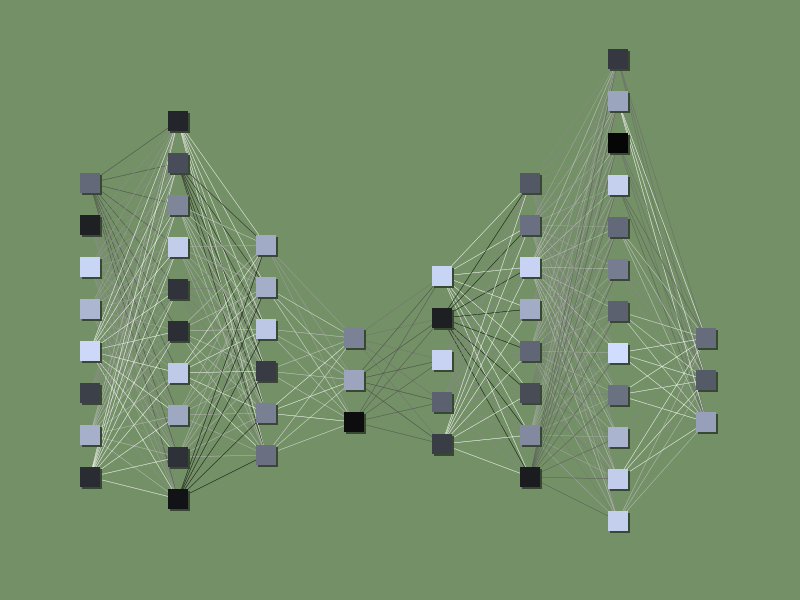

In [67]:

draw_background(color=rgb(128*0.9, 160*0.9, 128*0.8))

for (layer_i, layer) in enumerate(LAYERS):
    for (neuron_i, weight) in enumerate(layer['weights']):
        if layer_i < len(LAYERS) - 1:
            next_layer_size: int = LAYER_SIZES[layer_i + 1]
            for j in range(next_layer_size):
                off_x = NEURON_SIZE[0] / 2
                off_y = NEURON_SIZE[1] / 2
                x_0 = neuron_x(layer_i) + off_x
                y_0 = neuron_y(layer_i, neuron_i) + off_y
                x_1 = neuron_x(layer_i + 1) + off_x
                y_1 = neuron_y(layer_i + 1, j) + off_y
                
                def input_of(layer_i: int, neuron_i: int) -> float:
                    # XXX Does not take into account all inputs
                    return INPUTS[neuron_i % len(INPUTS)]

                draw_connection(
                    p1=(x_0, y_0),
                    p2=(x_1, y_1),
                    color=connection_color(
                        value=relu(
                            x=input_of(layer_i, neuron_i),
                            bias=layer['biases'][neuron_i],
                            weight=weight,
                        )
                    ),
                )

for (layer_i, layer) in enumerate(LAYERS):
    for (neuron_i, weight) in enumerate(layer['weights']):
        draw_neuron(
            x=neuron_x(layer_i),
            y=neuron_y(layer_i, neuron_i),
            color=neuron_color(weight)
        )

present()

In [68]:
[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# [cat-theory]

## Упражнение 3.5

> Проверьте, что функторы переводят изоморфизмы в изоморфизмы и обратные стрелки в обратные.

**Определение 3.5.1.** Функтор $F$ из категории $\mathrm{K}_1$ в категорию $\mathrm{K}_2$ – это пара отображений (обозначаемых одной буквой):

$$ F: \mathrm{Ob}(\mathrm{K}_1) \rightarrow \mathrm{Ob}(\mathrm{K}_2)
\\ F: \mathrm{Mor}(\mathrm{K}_1) \rightarrow \mathrm{Mor}(\mathrm{K}_2)
$$

При этом $\mathrm{Ob}(\mathrm{K})$ — это совокупность *объектов* категории $\mathrm{K}$, а $\mathrm{Mor}(\mathrm{K})$ — совокупность *морфизмов* (так же называются *стрелками*).

Применение функтора сохраняет $dom$, $cod$, $id$ и композицию. Таким образом для любых $f, g, A, B, C$ из $\mathrm{K}_1$ выполняется:

1. $f: A \rightarrow B$ влечёт $F(f): F(A) \rightarrow F(B)$
   - `TODO` показать
2. $F(id_A) = id_{F(A)}$
   - действительно, применяя 1 к 2 получаем: $F(A \xrightarrow{id_A} A) = F(A) \xrightarrow{F(id_A)} F(A) = id_{F(A)}$
3. $A \xrightarrow{f} B$ и $B \xrightarrow{g} C$ влечёт $F(g \circ f) = F(g) \circ F(f)$
   - `TODO` показать

**Определение 3.5.2.** Стрелка $f: A \rightarrow B$ называется *изоморфизмом*, если существует *обратная стрелка* $f^{-1}: B \rightarrow A$ со свойствами:

$$ f^{-1} \circ f = id_A
\\ f \circ f^{-1} = id_B
$$

При этом $id_A: A \rightarrow A$ и $id_B: B \rightarrow B$ — *единичные морфизмы*, отображающие объекты в такие же объекты.

**Проверка.** Пусть:

- $f_1: A_1 \rightarrow B_1$ — некий изоморфизм в категории $\mathrm{K}_1$
- $g^{-1}_1: D_1 \rightarrow C_1 $ — некая обратная стрелка в категории $\mathrm{K}_1$
- функтор $F$ переводит $f_1$ в $f_2$ из категории $\mathrm{K}_2$
- функтор $F$ переводит $g^{-1}_1$ в $g^{-1}_2$ из категории $\mathrm{K}_2$

Нам нужно показать, что:

1. $f_2 = F(f_1)$ тоже является изоморфиозмом
2. $g^{-1}_2 = F(g_1^{-1})$ является обратной стрелкой

**Интуиция.** Показав, как обратные стрелки переводятся в обратные, а "прямые" в "прямые", мы сможем показать, как соотносятся преобразованные стрелки в категории $\mathrm{K}_2$. "Прямыми" я называю стрелки, обратные к обратным.

Применим функтор $F$ к $g^{-1}_1$:

$$ g_2^{-1} = F(g_1^{-1}) = F(D_1 \xrightarrow{g_1^{-1}} C_1) = F(D_1) \xrightarrow{F(g_1^{-1})} F(C_1) =
\\ = F(D_1) \xrightarrow{g^{-1}_2} F(C_1)
$$

Также применим функтор $F$ к "прямой" стрелке $g_1$

$$ g_2 = F(g_1) = F(С_1 \xrightarrow{g_1} D_1) = F(С_1) \xrightarrow{F(g_1)} F(D_1) =
\\ = F(С_1) \xrightarrow{g_2} F(D_1)
$$

Теперь, применяя определение 3.5.2, а также разворачивая операцию композиции покажем, что $g_2^{-1}$ действительно является обратным к $g_2$, что докажет справедливость 2:

$$ g_2^{-1} \circ g_2 = F(D_1) \xrightarrow{g^{-1}_2} F(C_1) \circ F(С_1) \xrightarrow{g_2} F(D_1) =
\\ = F(D_1) \xrightarrow{g^{-1}_2} F(C_1) \xrightarrow{g_2} F(D_1) =
\\ = F(D_1) \xrightarrow{g^{-1}_2 \circ g_2} F(D_1) =
\\ = id_{F(D_1)}
$$

> Можно даже записывать:
>
> $$F(g_2^{-1}) = F^{-1}(g_2),$$
>
> но только если $F^{-1}$ существует, т.е. функтор $F$ является обратимым.

Теперь применим $F$ к $f_1$ и $f^{-1}_1$:

$$ F(f_1) = F(A_1 \xrightarrow{f_1} B_1) = F(A_1) \xrightarrow{f_2} F(B_1)
\\ F(f_1^{-1}) = F(B_1 \xrightarrow{f_1^{-1}} A_1) = F(B_1) \xrightarrow{f_2^{-1}} F(A_1)
$$

Покажем, что $f_2$ является изоморфизмом:

$$ f_2^{-1} \circ f_2 = F(B_1) \xrightarrow{f^{-1}_2} F(A_1) \circ F(A_1) \xrightarrow{f_2} F(B_1) =
\\ = F(B_1) \xrightarrow{f^{-1}_2} F(A_1) \xrightarrow{f_2} F(B_1) =
\\ = F(B_1) \xrightarrow{f^{-1}_2 \circ f_2} F(B_1) =
\\ = id_{F(B_1)}
$$

$$ f_2 \circ f_2^{-1} = F(A_1) \xrightarrow{f_2} F(B_1) \circ F(B_1) \xrightarrow{f^{-1}_2} F(A_1) =
\\ = F(A_1) \xrightarrow{f_2} F(B_1) \xrightarrow{f^{-1}_2} F(A_1) =
\\ = F(A_1) \xrightarrow{f_2 \circ f^{-1}_2} F(A_1) =
\\ = id_{F(A_1)}
$$

Таким образом, изоморфизмы преобразуются в изоморфизмы, а отношение обратности двух морфизмов сохраняется при применении к ним функтора.

Отметим, что эти выводы следуют напрямую из определения изоморфизма.